In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow.keras as tf
from tensorflow.keras.metrics import Precision, Recall

In [3]:
from sklearn.model_selection import train_test_split

In [4]:


###################### Start Here ######################################



norm_df = pd.read_csv("mimic_norm.csv")
(trainX, testX, trainY, testY) = train_test_split(norm_df.iloc[:, :-1], norm_df.iloc[:, -1], test_size=0.2)
trainX

,GENDER,ADMISSION_TYPE--EMERGENCY,ADMISSION_TYPE--URGENT,ADMISSION_TYPE--ELECTIVE,INSURANCE--Medicare,INSURANCE--Private,INSURANCE--Medicaid,INSURANCE--Government,INSURANCE--Self Pay,MARITAL_STATUS--MARRIED,...,ETHNICITY--ASIAN - CAMBODIAN,ETHNICITY--ASIAN - FILIPINO,ETHNICITY--ASIAN - ASIAN INDIAN,ETHNICITY--WHITE - EASTERN EUROPEAN,ETHNICITY--HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),DIAGNOSIS,PREV_SERVICE--CMED,PREV_SERVICE--CSURG,CURR_SERVICE--CMED,CURR_SERVICE--CSURG
1580,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2199,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1215,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1539,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2028,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2090,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
718,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1151,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
data_input = tf.layers.Input(shape=(trainX.shape[1],))

hidden = tf.layers.Dense(30, activation="tanh")(data_input)
hidden = tf.layers.Dense(15, activation="tanh")(hidden)
hidden = tf.layers.Dense(5, activation="tanh")(hidden)
hidden = tf.layers.Dropout(0.2)(hidden)
data_output = tf.layers.Dense(1, activation="sigmoid")(hidden)

model = tf.Model(inputs=data_input, outputs=data_output)

# compile model
model.compile(optimizer="adam", loss='mean_squared_error', metrics=["accuracy", tf.metrics.Precision(), tf.metrics.Recall()])

history = model.fit(trainX, trainY, validation_split=0.33, epochs=200)



Train on 1189 samples, validate on 587 samples
Epoch 1/200
1189/1189 [==============================] - 1s 841us/sample - loss: 0.3947 - accuracy: 0.1598 - precision_1: 0.1189 - val_loss: 0.2931 - val_accuracy: 0.1210 - val_precision_1: 0.1210
Epoch 2/200
1189/1189 [==============================] - 0s 308us/sample - loss: 0.2399 - accuracy: 0.6140 - precision_1: 0.1229 - val_loss: 0.1873 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 3/200
1189/1189 [==============================] - 0s 317us/sample - loss: 0.1721 - accuracy: 0.8082 - precision_1: 0.1071 - val_loss: 0.1458 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 4/200
1189/1189 [==============================] - 0s 294us/sample - loss: 0.1461 - accuracy: 0.8654 - precision_1: 0.1667 - val_loss: 0.1294 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 5/200
1189/1189 [==============================] - 0s 316us/sample - loss: 0.1313 - accuracy: 0.8738 - precision_1: 0.0000e+00 - val_loss: 0.1204 -

Epoch 40/200
1189/1189 [==============================] - 0s 259us/sample - loss: 0.1076 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1062 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 41/200
1189/1189 [==============================] - 0s 253us/sample - loss: 0.1056 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1062 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 42/200
1189/1189 [==============================] - 0s 272us/sample - loss: 0.1076 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1062 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 43/200
1189/1189 [==============================] - 0s 268us/sample - loss: 0.1071 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1062 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 44/200
1189/1189 [==============================] - 0s 265us/sample - loss: 0.1073 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1061 - val_accuracy: 0.8790 

Epoch 80/200
1189/1189 [==============================] - 0s 279us/sample - loss: 0.1019 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1042 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 81/200
1189/1189 [==============================] - 0s 272us/sample - loss: 0.1024 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1044 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 82/200
1189/1189 [==============================] - 0s 279us/sample - loss: 0.1006 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1041 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 83/200
1189/1189 [==============================] - 0s 268us/sample - loss: 0.1024 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1041 - val_accuracy: 0.8790 - val_precision_1: 0.0000e+00
Epoch 84/200
1189/1189 [==============================] - 0s 269us/sample - loss: 0.1008 - accuracy: 0.8823 - precision_1: 0.0000e+00 - val_loss: 0.1042 - val_accuracy: 0.8790 

444/444 [==============================] - 0s 115us/sample - loss: 0.1031 - accuracy: 0.8761 - precision: 0.3333

accuracy: 87.61%

precision: 33.33%


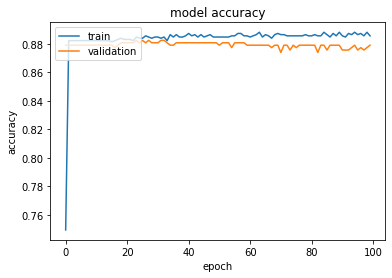

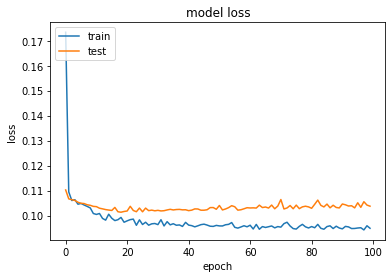

In [6]:
scores = model.evaluate(testX, testY)

print("---------------------------------------------------------------------------")
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))

print("\nData Distribution Ratio ("+str(list(trainY).count(0) / list(trainY).count(1))+"): ")
print("\tSurvived: " +str(list(trainY).count(0)))
print("\tNot survived: " + str(list(trainY).count(1)))
print("---------------------------------------------------------------------------")

print()
model.summary()

print()
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['precision'])
#plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['recall'])
#plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


cols = ['orange' if i == 0 else 'green' for i in norm_df["DEAD"]]

plt.scatter(range(len(df["AGE"])), df["AGE"], s=5, c=cols);
plt.title('Age rate of death')
plt.ylabel('age')
plt.xlabel('person')
#plt.legend(['survived', 'not survived'], loc='lower right')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(df["MARITAL_STATUS"].unique())
students = list(df["MARITAL_STATUS"].value_counts(normalize=True))
ax.bar(langs,students)

plt.title('MARITAL STATUS MARRIED rate of death')
plt.ylabel('status')
plt.xlabel('person')
#plt.legend(['survived', 'not survived'], loc='lower right')
plt.show()



In [ ]:
predic = model.predict(trainX)
predic